In [179]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import umap.umap_ as umap
import plotly.express as px
import numpy as np

In [180]:
d = pd.read_csv(r"C:\Users\il015\Desktop\UCL\matlab_scripts\Representational_drift_and_replay_analysis\Dimension Reduction\UMAP\neuralData_cross_validation.csv")

In [181]:
data = d.dropna()
allGoodCol = data.columns
allGoodCol = list(allGoodCol)
allGoodCol = allGoodCol[2::]

In [182]:
data

,x,lap,c1,c2,c3,c4,c5,c6,c7,c8,...,c167,c168,c169,c170,c171,c172,c173,c174,c175,c176
0,5.505403,1,0.0,0.000000,0.0,0.000000,0,0.0,0.108977,0.000000,...,0.0,0.054489,0.0,0.0,0.0,5.098882,0.000000,0.000000,0.0,0.000000
1,5.505403,1,0.0,0.000000,0.0,0.000000,0,0.0,0.402620,0.000000,...,0.0,0.402620,0.0,0.0,0.0,4.353179,0.000000,0.000000,0.0,0.000000
2,4.392248,1,0.0,0.000000,0.0,0.000000,0,0.0,0.244201,0.000000,...,0.0,0.244201,0.0,0.0,0.0,3.516645,0.000000,0.000000,0.0,0.000000
3,4.392248,1,0.0,0.000000,0.0,0.000000,0,0.0,0.054489,0.000000,...,0.0,0.054489,0.0,0.0,0.0,3.542891,0.000000,0.000000,0.0,0.000000
4,4.392248,1,0.0,0.000000,0.0,0.000000,0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,3.641774,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1846,194.090625,16,0.0,0.244201,0.0,0.488403,0,0.0,0.402620,1.452061,...,0.0,0.244201,0.0,0.0,0.0,0.976805,0.244201,0.244201,0.0,0.054489
1847,194.090625,16,0.0,0.402620,0.0,0.805240,0,0.0,0.244201,1.135224,...,0.0,0.402620,0.0,0.0,0.0,1.262349,0.402620,0.402620,0.0,0.244201
1848,194.090625,16,0.0,0.244201,0.0,0.488403,0,0.0,0.054489,0.407667,...,0.0,0.244201,0.0,0.0,0.0,0.732604,0.244201,0.244201,0.0,0.402620
1849,193.828848,16,0.0,0.054489,0.0,0.108977,0,0.0,0.000000,0.054489,...,0.0,0.054489,0.0,0.0,0.0,0.163466,0.054489,0.054489,0.0,0.244201


In [183]:
reducer = umap.UMAP(n_neighbors = 20, 
                    metric = 'cosine', 
                    output_metric = 'euclidean',
                    learning_rate = 1.0, 
                    init = 'spectral', 
                    min_dist = 0.1, 
                    spread = 1.0, 
                    repulsion_strength = 1.0,
                    negative_sample_rate = 5,
                    target_metric = 'categorical', 
                    dens_lambda = 2.0, 
                    dens_frac = 0.3,
                    dens_var_shift=0.1,
                    n_components = 3)

parsedData = data[allGoodCol].values

embedding = reducer.fit_transform(parsedData)
embedding.shape

(1851, 3)

In [184]:
df = pd.DataFrame(embedding, columns=['x1', 'x2', 'x3'])
df["x"] = data.x
df["lap"] = data.lap

In [185]:
fig = px.scatter_3d(df, x='x1', y='x2', z='x3',
              color='x', opacity=0.9)

fig.update_traces(marker_size=2)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [186]:
fig = px.scatter_3d(df, x='x1', y='x2', z='x3',
              color='lap', opacity=0.9)

fig.update_traces(marker_size=1.5)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

## Labeled UMAP by lap number

In [230]:
reducer = umap.UMAP(n_neighbors = 20, 
                    metric = 'cosine', 
                    output_metric = 'euclidean',
                    learning_rate = 1.0, 
                    init = 'spectral', 
                    min_dist = 0.1, 
                    spread = 1.0, 
                    repulsion_strength = 1.0,
                    negative_sample_rate = 5,
                    target_metric = 'categorical', 
                    dens_lambda = 2.0, 
                    dens_frac = 0.3,
                    dens_var_shift=0.1,
                    n_components = 3)

parsedData = data[allGoodCol].values

embedding = reducer.fit_transform(parsedData, y = data.lap)
embedding.shape

(1851, 3)

In [231]:
df = pd.DataFrame(embedding, columns=['x1', 'x2', 'x3'])
df["x"] = data.x
df["lap"] = data.lap

In [232]:
fig = px.scatter_3d(df, x='x1', y='x2', z='x3',
              color='x', opacity=0.9)

fig.update_traces(marker_size=1.5)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [233]:
fig = px.scatter_3d(df, x='x1', y='x2', z='x3',
              color='lap', opacity=0.9)

fig.update_traces(marker_size=1.3)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

## Get the quantity of energy spent per lap

#### Do we see an original increase and then a decrease ?

In [234]:
spikePerS = [sum(sum(parsedData[data.lap == i]))/len(data[data.lap == i]) for i in range(1, max(data.lap))]
spikePerS = [spikePerS[i]*10 for i in range(0, len(spikePerS))]

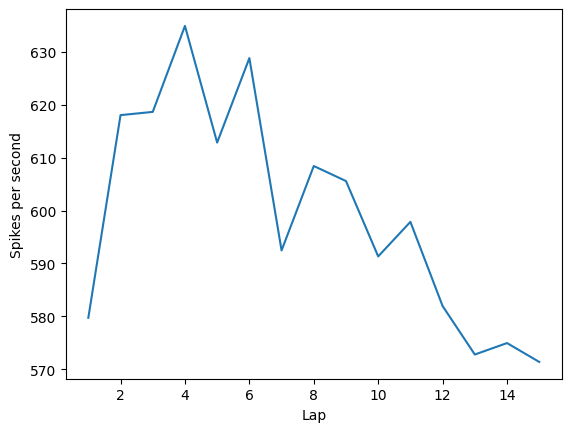

In [235]:
plt.plot(range(1, max(data.lap)), spikePerS)
plt.xlabel("Lap")
plt.ylabel("Spikes per second")
plt.show()

#### Is this dynamic coherent with foldings / unfoldings of the manifold ?

In [236]:
def curvature(vector):
    dx_dt = np.gradient(vector[0])
    dy_dt = np.gradient(vector[1])
    dz_dt = np.gradient(vector[2])

    dx_dt2 = np.gradient(dx_dt)
    dy_dt2 = np.gradient(dy_dt)
    dz_dt2 = np.gradient(dz_dt)

    curvature = np.abs(dx_dt*dy_dt2 - dy_dt*dx_dt2) / (dx_dt**2 + dy_dt**2)**1.5

    return curvature

Text(0, 0.5, 'Curvature')

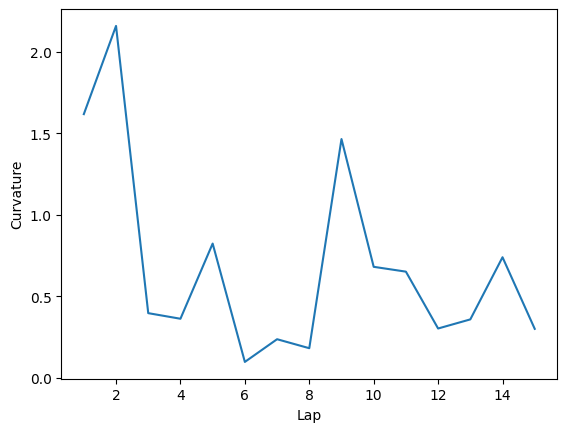

In [238]:
# curve = [np.mean(curvature(df[df.lap == i][["x1", "x2", "x3"]].values.T)) for i in range(1, max(data.lap))]
curve = []

for i in range(1, max(data.lap)):
    dataLap = df[df.lap == i]
    maxPoint = dataLap[dataLap["x"] == dataLap["x"].max()][["x1", "x2", "x3"]].values.T
    minPoint = dataLap[dataLap["x"] == dataLap["x"].min()][["x1", "x2", "x3"]].values.T

    euclDist = np.linalg.norm(maxPoint - minPoint)
    curve.append(1/euclDist)

plt.plot(range(1, max(data.lap)), curve)
plt.xlabel("Lap")
plt.ylabel("Curvature")


